# Buenas prácticas en Google Colab para compartir con equipos no técnicos

En equipos de trabajo donde conviven perfiles técnicos y no técnicos,
es frecuente que el equipo técnico desarrolle *notebooks* en Google
Colab para procesos periódicos: reportes mensuales, análisis de datos,
tareas recurrentes. El problema surge cuando estos procesos requieren
ejecución periódica con pequeñas variaciones —un mes diferente, otro
departamento, un nuevo archivo de entrada— y la responsabilidad de
ejecutarlos recae siempre sobre el equipo técnico.

Esta dinámica genera una sobrecarga innecesaria: el equipo técnico
se convierte en un cuello de botella para tareas que, con la
estructura adecuada, cualquier persona podría ejecutar de forma
autónoma.

La solución consiste en estructurar los *notebooks* de manera que
los equipos no técnicos puedan ejecutarlos por su cuenta, sin riesgo
de alterar la lógica y sin necesidad de entender el código. Este
*notebook* presenta las buenas prácticas que he aplicado en mi
experiencia y, además, sirve como plantilla descargable que puedes
adaptar a tus propios procesos.

## Estructura recomendada

La estructura que mejor me ha funcionado organiza el *notebook* en
cinco bloques bien definidos:

1. **Documentación**: celdas *Markdown* que explican qué hace el
   proceso, qué datos necesita, qué resultados genera y cómo
   utilizarlo.
2. **Importaciones e inicialización de Drive**: primera celda de
   código, siempre visible. Solicita los permisos de Google Drive
   lo antes posible para que el usuario los conceda de inmediato y
   el resto se ejecute sin interrupciones.
3. **Parámetros editables**: celda de código visible con campos de
   formulario de Colab. Son los únicos valores que el equipo no
   técnico debe modificar.
4. **Variables técnicas y lógica de procesamiento**: celdas de
   código ocultas para evitar confusión. Contienen configuraciones
   internas y funciones.
5. **Ejecución principal**: celda de código visible que ejecuta
   todo el proceso y muestra mensajes de progreso y resultados.

## Documentación del proceso

Todo *notebook* que se comparta debe comenzar con documentación
clara. Es la primera impresión que tendrá el usuario y determina
si podrá usarlo sin ayuda. La documentación debe incluir: qué
hace el proceso, qué datos de entrada necesita (archivos y
ubicación), qué datos de salida genera (archivos y ubicación) y
las instrucciones paso a paso para ejecutarlo.

A continuación se presenta un ejemplo de documentación para un
proceso de generación de reportes.

> **Proceso**: Reporte mensual por departamento.
>
> **Objetivo**: Generar un resumen mensual a partir de los datos
> de operaciones diarias de un departamento.
>
> **Datos de entrada**: Archivo CSV en
> `Mi unidad/reportes/datos/` con formato de nombre
> `datos_AAAA_MM.csv` (ejemplo: `datos_2026_02.csv`).
>
> **Datos de salida**: Reporte CSV en
> `Mi unidad/reportes/resultados/` con formato
> `reporte_DEPARTAMENTO_AAAA_MM.csv` (ejemplo:
> `reporte_ventas_2026_02.csv`).
>
> **Instrucciones**:
> 1. Ejecutar la primera celda de código y autorizar el acceso
>    a Google Drive.
> 2. Modificar los parámetros (año, mes y departamento) en la
>    celda de **Parámetros**.
> 3. En el menú, seleccionar *Entorno de ejecución* >
>    *Ejecutar todas* (o `Ctrl+F9`).
> 4. Esperar a que finalice. El progreso se mostrará en la
>    última celda.

## Importaciones e inicialización de Drive

Este bloque se ubica como primera celda de código por dos razones:

1. Google Drive requiere autorización del usuario. Si esta celda
   es la primera, el usuario concede el permiso de inmediato y el
   resto del *notebook* se ejecuta sin interrupciones.
2. Detección temprana de errores: si hay un problema con la
   conexión a Drive o con alguna dependencia, se detecta antes de
   ejecutar cualquier lógica.

In [ ]:
# @title Texto de título predeterminado
import pandas as pd
from datetime import datetime
from pathlib import Path

from google.colab import drive

drive.mount("/content/drive")
print("Drive conectado exitosamente.")

Mounted at /content/drive
Drive conectado exitosamente.


## Parámetros (equipo no técnico)

Esta es la única celda que el equipo no técnico debe modificar.
Los parámetros se presentan como campos de formulario de Colab
usando la sintaxis `#@param`, que genera controles visuales
(campos de texto, *dropdowns*, etc.) que facilitan la edición
sin tocar código.

Un consejo importante: usa listas cerradas
(`#@param ["opción1", ...]`) en lugar de texto libre siempre que
sea posible. Esto previene errores de escritura y garantiza
valores válidos.

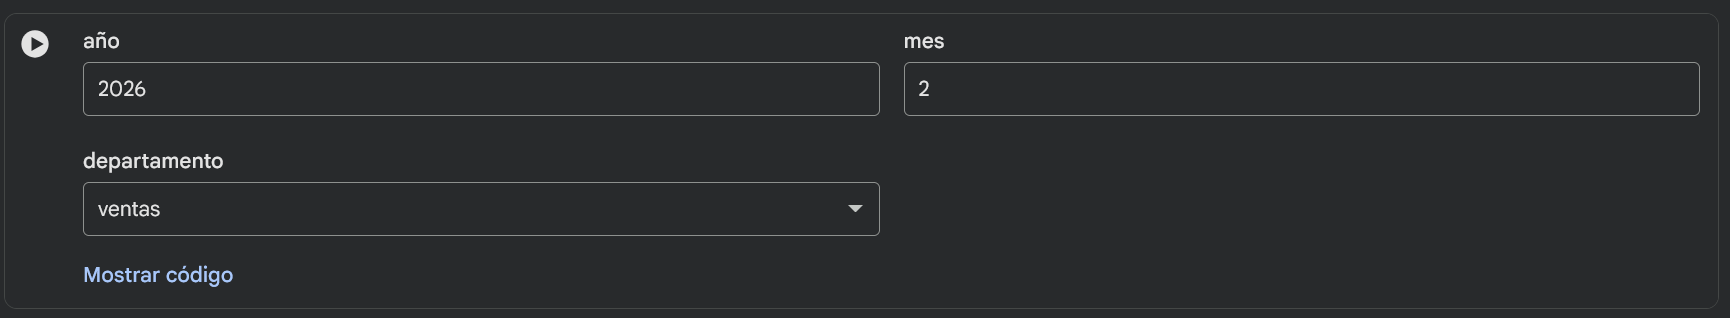

In [ ]:
#@title Parámetros del reporte
año = 2026 #@param {type:"integer"}
mes = 2 #@param {type:"integer"}
departamento = "ventas" #@param ["ventas", "marketing", "operaciones"]

## Variables técnicas (equipo técnico)

Las siguientes celdas contienen configuraciones internas que el
equipo no técnico no necesita ver ni modificar. En Google Colab,
las celdas se ocultan usando `#@title` como primera línea y
configurando la vista de formulario (*cellView: form*). Esto las
colapsa visualmente, mostrando solo el título.

Para configurarlo:

- Agrega `#@title Título descriptivo` como primera línea de la
  celda de código.
- Haz clic en los tres puntos de la celda > *Ver formulario*.
- O establece `"cellView": "form"` en los metadatos de la celda.

In [ ]:
#@title Variables técnicas (no modificar)
BASE_DIR = Path("/content/drive/MyDrive/reportes")
INPUT_DIR = BASE_DIR / "datos"
OUTPUT_DIR = BASE_DIR / "resultados"

INPUT_FILE = INPUT_DIR / f"datos_{año}_{mes:02d}.csv"
OUTPUT_FILE = OUTPUT_DIR / f"reporte_{departamento}_{año}_{mes:02d}.csv"

COLUMNAS_REQUERIDAS = ["fecha", "departamento", "categoria", "monto"]

## Lógica de procesamiento (equipo técnico)

La lógica de procesamiento también se oculta. Toda la
funcionalidad se encapsula en funciones con nombres descriptivos.
Esto facilita el mantenimiento por parte del equipo técnico y
evita que el equipo no técnico modifique accidentalmente la
lógica.

In [ ]:
#@title Funciones de procesamiento (no modificar)

def validar_parametros(anio, mes, departamento):
    """Valida que los parámetros sean correctos."""
    errores = []
    if not (2020 <= anio <= 2030):
        errores.append(f"Año fuera de rango: {anio}")
    if not (1 <= mes <= 12):
        errores.append(f"Mes inválido: {mes}")
    if departamento not in ["ventas", "marketing", "operaciones"]:
        errores.append(f"Departamento no reconocido: {departamento}")
    return errores


def cargar_datos(ruta):
    """Carga el archivo CSV y valida las columnas."""
    if not ruta.exists():
        raise FileNotFoundError(
            f"No se encontró el archivo: {ruta}\n"
            f"Verifique que el archivo exista en Google Drive."
        )
    df = pd.read_csv(ruta)
    faltantes = [c for c in COLUMNAS_REQUERIDAS if c not in df.columns]
    if faltantes:
        raise ValueError(f"Columnas faltantes en el archivo: {faltantes}")
    return df


def procesar_datos(df, departamento):
    """Filtra y agrega los datos por departamento."""
    df_filtrado = df[df["departamento"] == departamento].copy()
    if df_filtrado.empty:
        raise ValueError(
            f"No hay datos para el departamento: {departamento}"
        )
    resumen = (
        df_filtrado
        .groupby("categoria")
        .agg(
            total=("monto", "sum"),
            cantidad=("monto", "count"),
            promedio=("monto", "mean"),
        )
        .reset_index()
        .sort_values("total", ascending=False)
    )
    return resumen


def guardar_reporte(df, ruta):
    """Guarda el reporte en la ruta especificada."""
    ruta.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(ruta, index=False)

## Ejecución

Esta celda ejecuta el proceso completo. Se mantiene visible
para que el equipo no técnico pueda verificar el progreso y los
resultados. Los mensajes de *log* indican cada paso.

In [ ]:
print(f"{'=' * 50}")
print(f"Reporte: {departamento} - {año}/{mes:02d}")
print(f"{'=' * 50}")
print()

# Paso 1: Validar parámetros
print("▶ Validando parámetros...")
errores = validar_parametros(año, mes, departamento)
if errores:
    for error in errores:
        print(f"  ✗ {error}")
    raise SystemExit("Proceso detenido por errores en parámetros.")
print("  ✓ Parámetros válidos.")

# Paso 2: Cargar datos
print(f"▶ Cargando datos desde: {INPUT_FILE.name}")
df = cargar_datos(INPUT_FILE)
print(f"  ✓ {len(df)} registros cargados.")

# Paso 3: Procesar datos
print(f"▶ Procesando datos para '{departamento}'...")
resumen = procesar_datos(df, departamento)
print(f"  ✓ {len(resumen)} categorías en el resumen.")

# Paso 4: Guardar reporte
print(f"▶ Guardando reporte en: {OUTPUT_FILE.name}")
guardar_reporte(resumen, OUTPUT_FILE)
print(f"  ✓ Reporte guardado exitosamente.")

print()
print(f"{'=' * 50}")
print("Proceso finalizado.")
print(f"{'=' * 50}")

Reporte: ventas - 2026/02

▶ Validando parámetros...
  ✓ Parámetros válidos.
▶ Cargando datos desde: datos_2026_02.csv
  ✓ 300 registros cargados.
▶ Procesando datos para 'ventas'...
  ✓ 4 categorías en el resumen.
▶ Guardando reporte en: reporte_ventas_2026_02.csv
  ✓ Reporte guardado exitosamente.

Proceso finalizado.


## Convenciones de nombres

Una de las buenas prácticas más importantes es usar nombres
fijos o con formato programático para archivos y carpetas. Esto
previene errores humanos y facilita la automatización.

### Nombres a evitar

| Ejemplo | Problema |
|---------|----------|
| `reporte enero.csv` | Espacio en el nombre, sin año, texto libre |
| `Datos_Ventas_2026.CSV` | Mayúsculas inconsistentes, extensión en mayúscula |
| `mi reporte (final) v2.csv` | Caracteres especiales, versionado manual |

### Formato recomendado

| Tipo | Formato | Ejemplo |
|------|---------|----------|
| Datos de entrada | `datos_AAAA_MM.csv` | `datos_2026_02.csv` |
| Reporte de salida | `reporte_DEPTO_AAAA_MM.csv` | `reporte_ventas_2026_02.csv` |
| Registros | `log_DEPTO_AAAA_MM.txt` | `log_ventas_2026_02.txt` |

Las variables del nombre (año, mes, departamento) se construyen
programáticamente a partir de los parámetros. El equipo no
técnico **nunca** escribe nombres de archivos manualmente.

## Consideraciones de tiempo de ejecución

Google Colab tiene limitaciones de tiempo que conviene conocer:

- Las sesiones gratuitas se desconectan tras ~90 minutos de
  inactividad o 12 horas de ejecución continua.
- Colab Pro ofrece sesiones más largas, pero sigue siendo
  limitado.

Recomendaciones:

1. **Guardar resultados intermedios**: si el proceso es largo,
   guarda resultados parciales en Drive después de cada etapa.
   Si la sesión se desconecta, no se pierde el progreso.
2. **Indicadores de progreso**: usa `print()` o `tqdm` para
   que el usuario sepa que el proceso sigue en ejecución.
3. **Procesamiento por lotes**: si los datos son muy grandes,
   procesa en *chunks* en lugar de cargar todo en memoria.
4. **Manejo de errores**: envuelve la ejecución en bloques
   `try/except` para guardar resultados parciales en caso de
   fallo.

## Resumen de buenas prácticas

1. Documentar el proceso al inicio del *notebook*.
2. Colocar importaciones y conexión a Drive como primera celda
   de código.
3. Separar los parámetros editables en una celda visible con
   formularios de Colab (`#@param`).
4. Ocultar las variables técnicas y la lógica de procesamiento
   usando `#@title` y la vista de formulario.
5. Usar una celda de ejecución visible con mensajes de progreso.
6. Usar nombres de archivos fijos o con formatos programáticos,
   nunca texto libre.
7. Considerar las limitaciones de tiempo de ejecución de Colab.
8. Preferir listas cerradas sobre campos de texto libre en los
   parámetros.

## Referencias

- [Google Colab FAQ](https://research.google.com/colaboratory/faq.html). Google.
- [Adding form fields to Colab notebooks](https://colab.research.google.com/notebooks/forms.ipynb). Google Colab.
- [Mounting Google Drive in Colab](https://colab.research.google.com/notebooks/io.ipynb). Google Colab.